## Dataset of chocolate ratings imported from http://flavorsofcacao.com/chocolate_database.html

Goals - determine what factors are most important for predicting a high chocolate rating 

Use a ML model to come up with an algorithm to predict the rating of chocolate based on some factors. 

In [3]:
# Import all needed packages 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load csv file into a DataFrame 
chocolate_df = pd.read_csv('flavors_of_cacao.csv')
#chocolate_df = pd.read_csv("chocolate_ratings.csv")

# Check first 5 rows of DataFrame to make sure it loaded correctly 
chocolate_df.head()


,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
# Rename some columns so they're easier to work with 
original_colnames = chocolate_df.columns
new_colnames = ['company', 'species', 'REF', 'review_year', 'cocoa_percent',
                'company_location', 'rating', 'bean_typ', 'country']
chocolate_df = chocolate_df.rename(columns=dict(zip(original_colnames, new_colnames)))

In [9]:
# modify data type to change the cocoa % from a string to a float
chocolate_df['cocoa_percent'] = chocolate_df['cocoa_percent'].str.replace('%','').astype(float)/100
chocolate_df.head()

,company,species,REF,review_year,cocoa_percent,company_location,rating,bean_typ,country,is_blend
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,False
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,False
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,False
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,False
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,False


In [10]:
# Remove unnessessary columns - Reference Number
# It is not important for analysis or prediction

chocolate_df = chocolate_df.drop(['REF'],axis=1)
chocolate_df.head()

,company,species,review_year,cocoa_percent,company_location,rating,bean_typ,country,is_blend
0,A. Morin,Agua Grande,2016,0.63,France,3.75,,Sao Tome,False
1,A. Morin,Kpime,2015,0.70,France,2.75,,Togo,False
2,A. Morin,Atsane,2015,0.70,France,3.00,,Togo,False
3,A. Morin,Akata,2015,0.70,France,3.50,,Togo,False
4,A. Morin,Quilla,2015,0.70,France,3.50,,Peru,False


In [11]:
# Split the data into a training and a testing dataset 
#chocolate_df['split'] = np.random.randn(chocolate_df.shape[0],1)
msk = np.random.rand(len(chocolate_df)) <= 0.7

train = chocolate_df[msk]
test = chocolate_df[~msk]

#Check to see if train and test are split correctly 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1794
Data columns (total 9 columns):
company             1293 non-null object
species             1293 non-null object
review_year         1293 non-null int64
cocoa_percent       1293 non-null float64
company_location    1293 non-null object
rating              1293 non-null float64
bean_typ            1292 non-null object
country             1292 non-null object
is_blend            1293 non-null bool
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 92.2+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 1788
Data columns (total 8 columns):
company             554 non-null object
species             554 non-null object
review_year         554 non-null int64
cocoa_percent       554 non-null float64
company_location    554 non-null object
rating              554 non-null float64
bean_typ            554 non-null object
country             553 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 39.0+ KB


# It looks like the training dataset has 1241 entries (69%) and the test dataset has 554 entries (31%). Perfect. 

# Note - these values switch every time the dataset is split. Can use a seed to stabilize the randomization if needed. 

In [42]:
1241/(1241 + 554)

0.6913649025069638

In [50]:
train.head()

,company,species,cocoa_percent,company_location,rating,bean_typ,country
1,A. Morin,Kpime,0.7,France,2.75,,Togo
3,A. Morin,Akata,0.7,France,3.50,,Togo
4,A. Morin,Quilla,0.7,France,3.50,,Peru
5,A. Morin,Carenero,0.7,France,2.75,Criollo,Venezuela
7,A. Morin,Sur del Lago,0.7,France,3.50,Criollo,Venezuela


In [70]:
test.head()

,company,species,review_year,company_location,rating,bean_typ,country
0,A. Morin,Agua Grande,2016,France,3.75,,Sao Tome
2,A. Morin,Atsane,2015,France,3.00,,Togo
6,A. Morin,Cuba,2014,France,3.50,,Cuba
9,A. Morin,Pablino,2014,France,4.00,,Peru
11,A. Morin,Madagascar,2013,France,3.00,Criollo,Madagascar


# Set aside the test dataset and work with the training data at this point. 

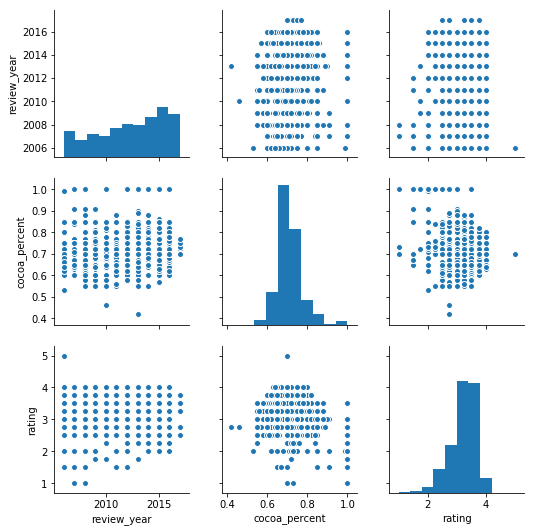

In [45]:
# Initial descriptive graphs to identify variables to focus on or to exclude
sns.pairplot(train)


From this it looks like there is an even distribution of ratings by review year, thus review year will not be a good factor to predict rating. We can remove this from the datasets. 

Cocoa percent also seems to not have much of an effect, but I will confirm with another graph. Compared cocoa percent for each rating category. There is clearly no correlation between cocoa percent and rating of chocolate, so I will remove this variable as well. 

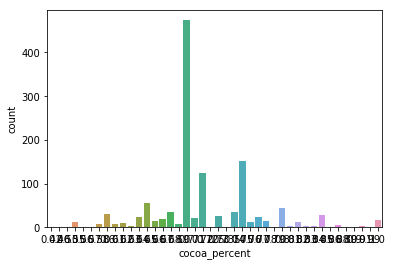

In [64]:
sns.countplot(x='cocoa_percent',data=train)

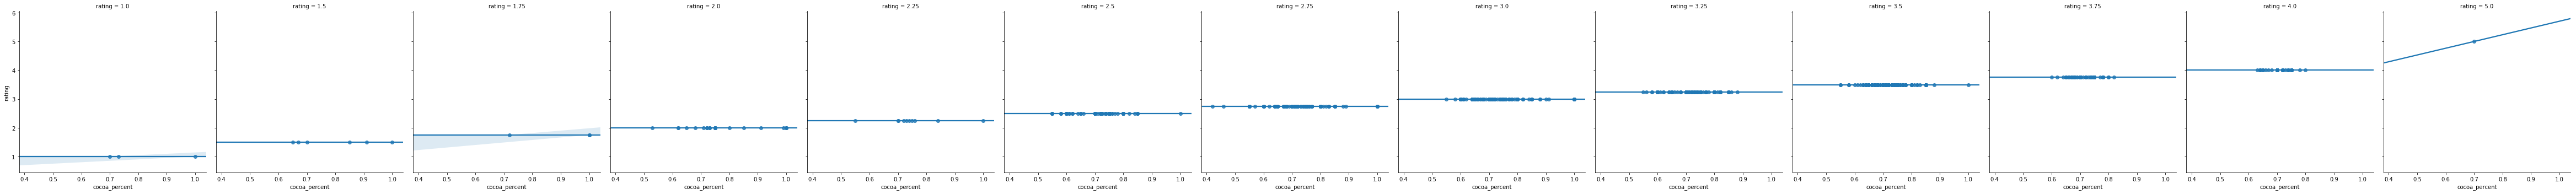

In [63]:
sns.lmplot(x='cocoa_percent',y='rating',data=train,col='rating')

## Remove review_year and cocoa_percent columns

In [12]:
# Drop review_year & cocoa_precent columns
train = train.drop(['review_year','cocoa_percent'],axis=1)
train.head()

# Also remove from test to keep consistent
test = test.drop(['review_year','cocoa_percent'],axis=1)

"""Note - once this has been run it modifies the objects, 
if you re-run it, it will error since the column is no longer there to be removed"""

'Note - once this has been run it modifies the objects, \nif you re-run it, it will error since the column is no longer there to be removed'

In [67]:
#check dataframe
train.head()

,company,species,company_location,rating,bean_typ,country
1,A. Morin,Kpime,France,2.75,,Togo
3,A. Morin,Akata,France,3.50,,Togo
4,A. Morin,Quilla,France,3.50,,Peru
5,A. Morin,Carenero,France,2.75,Criollo,Venezuela
7,A. Morin,Sur del Lago,France,3.50,Criollo,Venezuela


# Do company, species, location, bean type, or country have a strong correlation with rating? 


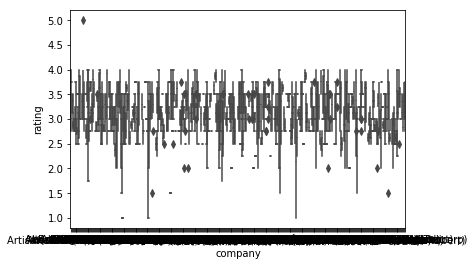

In [54]:
# company
sns.boxplot(x='company',y='rating', data=train, palette='rainbow')


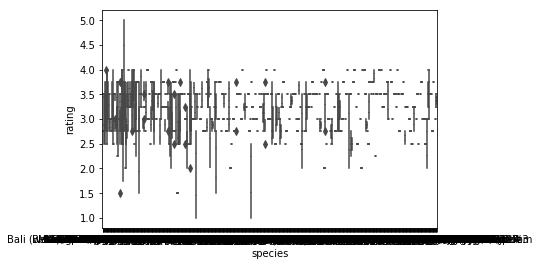

In [55]:
#species
sns.boxplot(x='species',y='rating', data=train, palette='rainbow')

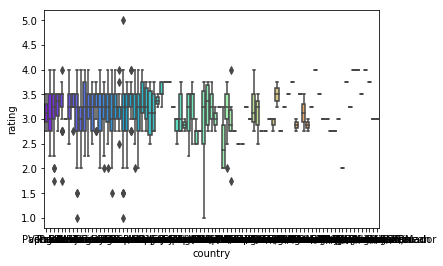

In [56]:
#company
sns.boxplot(x='country',y='rating', data=train, palette='rainbow')

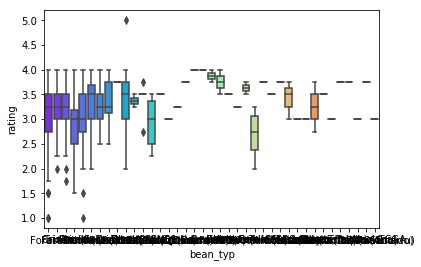

In [58]:
#bean type
sns.boxplot(x='bean_typ',y='rating', data=train, palette='rainbow')

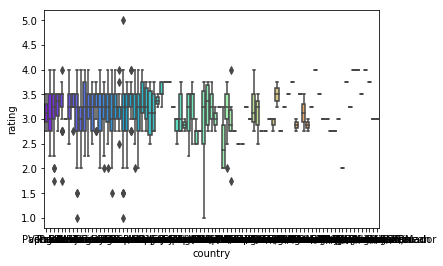

In [68]:
# country
sns.boxplot(x='country',y='rating', data=train, palette='rainbow')

# None of these look promising, maybe I should investigate whether blends are better than single origin chocolate. 

In [71]:
#Look at a list of all of the different countries listed
# Using a set to avoid duplicates
print(set(chocolate_df['country']))

{nan, 'India', 'PNG, Vanuatu, Mad', 'South America', 'Ghana, Panama, Ecuador', 'Dominican Rep., Bali', 'Ivory Coast', 'Domincan Republic', 'Africa, Carribean, C. Am.', 'Mexico', 'Venez,Africa,Brasil,Peru,Mex', '\xa0', 'Venezuela/ Ghana', 'Suriname', 'Peru, Ecuador', 'Venezuela, Trinidad', 'Venezuela, Dom. Rep.', 'Mad., Java, PNG', 'Ecuador, Costa Rica', 'Peru(SMartin,Pangoa,nacional)', 'Haiti', 'Central and S. America', 'Trinidad, Tobago', 'DR, Ecuador, Peru', 'Sao Tome & Principe', 'Cuba', 'Peru, Mad., Dom. Rep.', 'Costa Rica', 'Belize', 'Venezuela', 'Malaysia', 'Colombia', 'Peru, Ecuador, Venezuela', 'Papua New Guinea', 'Gabon', 'Venezuela, Java', 'Principe', 'Ven, Bolivia, D.R.', 'Ven., Indonesia, Ecuad.', 'Trinidad-Tobago', 'Cost Rica, Ven', 'Brazil', 'Ghana, Domin. Rep', 'Burma', 'Ven, Trinidad, Ecuador', 'Tanzania', 'St. Lucia', 'Solomon Islands', 'Nigeria', 'Hawaii', 'Trinidad, Ecuador', 'Australia', 'Ghana & Madagascar', 'Ecuador', 'Dominican Republic', 'Peru, Belize', 'Bolivia

In [16]:
# Create a new column to add to the dataframe to indicate if it is a blend or single origin 
# column title: is_blend. Values True or False

is_blend = pd.Series()
chocolate_df['is_blend'] = is_blend

for country in chocolate_df['country']: 
    if ',' in chocolate_df['country']: 
        chocolate_df['is_blend'] = True
    elif 'blend' in chocolate_df['country']: 
        chocolate_df['is_blend'] = True
    else: 
        chocolate_df['is_blend'] = False 

chocolate_df.head()

if chocolate_df['is_blend'].empty = True:
    print("error" + chocolate_df['index'])


SyntaxError: invalid syntax (<ipython-input-16-a2e28df9722d>, line 17)